In [1]:
# ËºâÂÖ•ÂøÖË¶ÅÁöÑMODULE
import requests, json, datetime, jieba
import pandas as pd
from wordcloud import WordCloud

In [2]:
# ÈÅ∏ÂèñÈÅäÊà≤È°ûÂà•ÁöÑÊñ∞ËÅûÔºåÂêë‰∏ãÊç≤ÂãïÂæåÁôºÁèæÂÖ∂APIÈÄ£ÁµêÂ¶Ç‰∏ã
# ‰øÆÊîπÂÖ∂ÊèêÂèñÊï∏ÈáèËá≥500Á≠Ü
r = requests.get('https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNewsByBucketGroup&groupid=Game_tw&len=500')

# ÊääDATAËΩâÊèõÊàêJSONÊ†ºÂºè
data = json.loads(r.text)

data

{'items': [{'itemuid': '68747470733A2F2F6368696E6573652E656E6761646765742E636F6D2F6D6963726F736F66742D78626F782D67616D65732D73686F77636173652D78626F782D7365726965732D782D3032303031323530382E68746D6C',
   'newsid': '0000017326DBE4E068747470733A2F2F6368696E6573652E656E6761646765742E636F6D2F6D6963726F736F66742D78626F782D67616D65732D73686F77636173652D78626F782D7365726965732D782D3032303031323530382E68746D6C',
   'itemsrctype': 2,
   'ctype': 5,
   'title': 'ÂæÆËªüÁöÑ‰∏ã‰∏ÄÂ†¥ Xbox Series X Áõ¥Êí≠Â∞áÂú® 7 Êúà 23 Êó•ÊîæÈÄÅ',
   'description': 'ÂæÆËªüÂÆ£‰Ωà‰∫ÜÂ∞áÂú®ÁæéÊù±ÊôÇÈñì 7 Êúà 23 Êó•‰∏≠ÂçàÔºàÊàëÂÄëÁöÑ\u3000 7 Êúà 24 Êó•ÂáåÊô® 12 ÈªûÔºâÈÖçÂêà Summer Game Fest Ê¥ªÂãïÊí≠Âá∫‰∏ÄÈõÜ Xbox ÈÅäÊà≤ÁöÑÂ±ïÁ§∫ÔºåÈõñÁÑ∂Ë™™ÈÇÑË¶ÅÂÜçÁ≠âÂÖ©ÂÄãÂ§öÁ¶ÆÊãúÔºå‰ΩÜÂ•ΩÊ≠πÊòØÊúâÂÄãÊó•Êúü‰∫Ü„ÄÇ',
   'thumbimgurl': 'https://s.yimg.com/os/creatr-uploaded-images/2020-07/15a48cf0-bfdb-11ea-bdbe-818cbd9042aa',
   'linkurl': 'https://chinese.engadget.com/microsoft-xbox-games-showcase-xbox-series-x-020012508.html',
   '

In [3]:
# ÊèêÂèñÊØè‰∏ÄÁ≠ÜITEMË≥áÊñôÁöÑ‰∏çÂêåÂÖßÂÆπ:
articles_id = []
articles_title = []
articles_description = []
articles_url = []
articles_uidactscore = []
articles_updatetime = []
count = 0

for item in data['items']:
    count +=1
    articles_id.append(count)
    articles_title.append(item.get('title'))
    articles_description.append(item.get('description'))
    articles_url.append(item.get('linkurl'))
    articles_uidactscore.append(int(item['metrics']['uidactscore']))
    articles_updatetime.append(datetime.datetime.fromtimestamp(int(item['metrics']['updatetime'])//1000)) # ÊääÊõ¥Êñ∞ÊôÇÈñìËΩâÊèõÊàêÂèØËÆÄÊ†ºÂºè


df = pd.DataFrame(columns=['ID','Title','Description','Link','Uidact_Score','Update_Time'])
df['ID'] = articles_id
df['Title'] = articles_title
df['Description'] = articles_description
df['Link'] = articles_url
df['Uidact_Score'] = articles_uidactscore
df['Update_Time'] = articles_updatetime

# ÊääÊõ¥Êñ∞ÊôÇÈñìËΩâÊèõÊàêÂèØËÆÄÊ†ºÂºè

df.head()




ID                                             Title  \
0   1              ÂæÆËªüÁöÑ‰∏ã‰∏ÄÂ†¥ Xbox Series X Áõ¥Êí≠Â∞áÂú® 7 Êúà 23 Êó•ÊîæÈÄÅ   
1   2                 PS2ÊúÄÁµÇÁ†¥Ëß£ÊñπÊ°àÔºåFreeDVDBootÈÄöÂêÉÊâÄÊúâ‰∏ªÊ©ü | TÂÆ¢ÈÇ¶   
2   3                        Â¶ÇÊûúÊúâ PS5 ÈªëËâ≤Ê©üÔºåÊúÉÊòØ‰ªÄÈ∫ºÊ®£Ôºü | Qooah   
3   4  ÈÄô 8 Ê¨æ App Ê¶ÆÁç≤ Apple ËÇØÂÆöÔºÅË®≠Ë®àÂá∫Ëâ≤ÂÖºÂÖ∑ÂâµÊñ∞„ÄÅÂ∑ßÊÄù Ë∂ïÂø´‰∏ãËºâË©¶Ë©¶ÔºÅ - ÈõªÁç∫Â∞ëÂ•≥   
4   5  Â≠∏ÂßäÂõû‰æÜ‰∫ÜÔºÅ„ÄäËøîÊ†°„ÄãÊîπÁ∑®ÂΩ±ÈõÜ Âª∂Á∫åÈõªÁé©IPÊâìÈÄ†ÂÖ®Êñ∞ÊïÖ‰∫ã | BeautiMode ÂâµÊÑèÁîüÊ¥ªÈ¢®Ê†ºÁ∂≤   

                                         Description  \
0  ÂæÆËªüÂÆ£‰Ωà‰∫ÜÂ∞áÂú®ÁæéÊù±ÊôÇÈñì 7 Êúà 23 Êó•‰∏≠ÂçàÔºàÊàëÂÄëÁöÑ„ÄÄ 7 Êúà 24 Êó•ÂáåÊô® 12 ÈªûÔºâÈÖçÂêà...   
1  ÈñãÁôºËÄÖCTurtÊó•ÂâçÈáãÂá∫FreeDVDBootÁ†¥Ëß£Â∑•ÂÖ∑ÔºåÂÆÉËÉΩÈÄèÈÅéSony PlayStati...   
2  Èö®Ëëó PlayStation 5 Êï∏Á¢ºÁâàÂíåÁ¢üÊ©üÁâàÁöÑÈáèÁî¢Â§ñÂΩ¢Ê≠£ÂºèÂÖ¨‰ΩàÔºå‰∏çÂêåÊñº‰πãÂâç‰ªª‰Ωï‰∏Ä‰ª£ÔºåPS...   
3  Apple ËøëÊúüÈ†íÁôºÂπ¥Â∫¶„ÄåApple Design Award„ÄçÁµ¶ 8 ‰Ωç App ËàáÈÅäÊà≤Èñã...   
4  „Äå‰Ω†ÊòØÂõû‰æÜ‰∫Ü ÈÇÑÊòØ‰∏çÊõæÈõ¢ÈñãÈÅéÔºü„ÄçÂÖ¨ÂÖ±ÈõªË¶ñÊîπÁ∑®ÂÖ®ÁêÉÊö¢Èä∑ÈõªÁé©IP„ÄäËøîÊ†°„ÄãÊé®Âá∫ÂΩ±ÈõÜÁâàÔºåÈ¶ñÊ≥¢ÂâçÂ∞éÂãïÊÖã...   

                                                Link  Uidact_Score  \
0  https://chinese.engadget.com/microsoft-xbox-ga...            60   
1  https://www.techbang.com/posts/79716-ps2-final...            45   
2  https://qooah.com/2020/07/06/black-color-ps5-r...            20   
3  https://agirls.aotter.net/post/57598?utm_campa...            35   
4  https://www.beautimode.com/article/content/876...            10   

          Update_Time  
0 2020-07-07 13:14:40  
1 2020-07-07 13:23:04  
2 2020-07-07 13:17:32  
3 2020-07-07 09:17:42  
4 2020-07-07 12:33:17

In [4]:
import matplotlib.pyplot as plt
df_sorted = df.sort_values(by='Uidact_Score', ascending=False)
df_top10 = df_sorted.head(10).sort_values(by='Uidact_Score', ascending=True)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
df_top10.plot(kind='barh',x='Title',y='Uidact_Score')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
stop_words = ['...','Êé®Âá∫','ÂÆ£‰Ωà','2020','12','Áé©ÂÆ∂','Ê≠£Âºè','Â∞áÊñº','ÂèØ‰ª•','‰∏ÄÊ¨æ','Âç≥Â∞á']

word_list = []


for des in articles_description:
    if des != None:
        words = jieba.cut(des)
        for word in words:
            if word not in stop_words and len(word)>1:
                word_list.append(word)

counter = {x:word_list.count(x) for x in word_list}

df2 = pd.DataFrame(columns=['Word','Frequency'])
df2['Word'] = counter.keys()
df2['Frequency'] = counter.values()

# ÂàóÂá∫TOP 20ÊúÄÂ∏∏Âá∫ÁèæÂ≠óË©û
df2.sort_values(by=['Frequency'], ascending = False)[0:19]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\leosi\AppData\Local\Temp\jieba.cache
Loading model cost 0.659 seconds.
Prefix dict has been built successfully.


Word  Frequency
17            ÈÅäÊà≤        249
57           PS5         99
184           È†êÂÆö         62
194           ÊúÄÊñ∞         53
13            Ê¥ªÂãï         52
219           Êó•Êú¨         51
170           ÂÖ¨Èñã         51
254          PS4         51
35            ‰∏ªÊ©ü         50
242           ÈñãÁôº         48
192           ÂÆòÊñπ         47
282           Êñ∞‰Ωú         46
301           Á≥ªÂàó         45
256           PC         45
190          ÁôºË°®ÊúÉ         44
350        Games         44
539           ÂÖ®Êñ∞         43
34   PlayStation         37
655       Switch         37

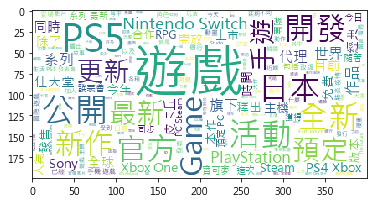

In [6]:
wcloud = WordCloud(background_color='white',font_path = 'msjh.ttf').generate(' '.join(word_list))
print(wcloud)
plt.imshow(wcloud)